In [151]:
import itertools
import json
import logging
import math
import os

from matplotlib import pyplot as plt
import pandas as pd
import papermage
from papermage.recipes import CoreRecipe
from papermage.visualizers import plot_entities_on_page
from tqdm.auto import tqdm

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
recipe = CoreRecipe()

INFO:CoreRecipe:Instantiating recipe...
INFO:iopath.common.file_io:URL https://www.dropbox.com/s/ukbw5s673633hsw/publaynet-tf_efficientdet_d0.pth.tar?dl=1 cached in /Users/sireeshgururaja/.torch/iopath_cache/s/ukbw5s673633hsw/publaynet-tf_efficientdet_d0.pth.tar?dl=1
INFO:timm.models._helpers:Loaded state_dict from checkpoint '/Users/sireeshgururaja/.torch/iopath_cache/s/ukbw5s673633hsw/publaynet-tf_efficientdet_d0.pth.tar?dl=1'
INFO:CoreRecipe:Finished instantiating recipe


In [9]:
paper_list = [recipe.from_pdf(f"data/AM_Creep_Papers/{paper_filename}") for paper_filename in tqdm(os.listdir("data/AM_Creep_Papers/"))]

  0%|          | 0/19 [00:00<?, ?it/s]INFO:CoreRecipe:Parsing document...


INFO:CoreRecipe:Rasterizing document...
INFO:CoreRecipe:Predicting words...
INFO:CoreRecipe:Predicting sentences...
INFO:CoreRecipe:Predicting blocks...
100%|██████████| 11/11 [00:11<00:00,  1.04s/it]
INFO:CoreRecipe:Predicting vila...
  5%|▌         | 1/19 [00:24<07:15, 24.21s/it]INFO:CoreRecipe:Parsing document...
INFO:CoreRecipe:Rasterizing document...
INFO:CoreRecipe:Predicting words...
INFO:CoreRecipe:Predicting sentences...
INFO:CoreRecipe:Predicting blocks...
100%|██████████| 17/17 [00:17<00:00,  1.04s/it]
INFO:CoreRecipe:Predicting vila...
 11%|█         | 2/19 [01:08<10:12, 36.03s/it]INFO:CoreRecipe:Parsing document...
INFO:CoreRecipe:Rasterizing document...
INFO:CoreRecipe:Predicting words...
INFO:CoreRecipe:Predicting sentences...
INFO:CoreRecipe:Predicting blocks...
100%|██████████| 12/12 [00:13<00:00,  1.09s/it]
INFO:CoreRecipe:Predicting vila...
 16%|█▌        | 3/19 [01:31<07:59, 29.96s/it]INFO:CoreRecipe:Parsing document...
INFO:CoreRecipe:Rasterizing document...
INFO:C

In [16]:
print("\n\n".join([paper.titles[0].text.replace("\n", " ") for paper in paper_list]))

Microstructural design of Ni-base alloys for high-temperature applications: impact of heat treatment on microstructure and mechanical properties after selective laser melting

A creep-resistant additively manufactured Al-Ce-Ni-Mn alloy (cid:2)

Microstructure and Mechanical Properties of CMSX-4 Single Crystals Prepared by Additive Manufacturing

Compressive creep behavior of selective laser melted CoCrFeMnNi high-entropy alloy strengthened by in-situ formation of nano-oxides

Materials

On the creep performance of the Ti-6Al-4V alloy processed by additive manufacturing

Effects of build direction and heat treatment on creep properties of Ni-base superalloy built up by additive manufacturing

Superior resistance to high–temperature creep in an additively manufactured precipitation–hardened CrMnFeCoNi high–entropy alloy nanocomposite

A

Phase and grain size inhomogeneity and their inﬂuences on creep behavior of Co–Cr–Mo alloy additive manufactured by electron beam melting

High-temperat

In [141]:
def highlight_relevant_entities(document):
    page_images = []
    for page in document.pages:
        highlighted = page.images[0]
        # highlighted = plot_entities_on_page(highlighted, page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
        highlighted = plot_entities_on_page(highlighted, page.abstracts, box_width=2, box_alpha=0.1, box_color="orange")
        highlighted = plot_entities_on_page(highlighted, page.captions, box_width=2, box_alpha=0.1, box_color="orange")

        highlighted = plot_entities_on_page(highlighted, page.tables, box_width=2, box_alpha=0.1, box_color="yellow")
        highlighted = plot_entities_on_page(highlighted, page.figures, box_width=2, box_alpha=0.1, box_color="yellow")

        highlighted = plot_entities_on_page(highlighted, page.sections, box_width=2, box_alpha=0.1, box_color="green")
        highlighted = plot_entities_on_page(highlighted, page.titles, box_width=2, box_alpha=0.1, box_color="green")

        highlighted = plot_entities_on_page(highlighted, page.blocks, box_width=2, box_alpha=0.1, box_color="grey")

        page_images.append(highlighted)
    return page_images

In [142]:
paper_iter = iter(paper_list)

In [143]:
sample_paper.sections[2].sentences

[Annotated Entity:	ID: 108	Spans: True	Boxes: False	Text: 3 Results and discussion
 The microstructure in the as-processed condition is shown in
 Fig.]

In [144]:
sample_paper.layers

['symbols',
 'images',
 'metadata',
 'tokens',
 'rows',
 'pages',
 'words',
 'sentences',
 'blocks',
 'vila_entities',
 'titles',
 'paragraphs',
 'authors',
 'abstracts',
 'keywords',
 'sections',
 'lists',
 'bibliographies',
 'equations',
 'algorithms',
 'figures',
 'tables',
 'captions',
 'headers',
 'footers',
 'footnotes']

In [145]:
sample_paper.sections[2]

Annotated Entity:	ID: 2	Spans: True	Boxes: True	Text: 3 Results and discussion

Microstructural design of Ni-base alloys for high-temperature
applications: impact of heat treatment on microstructure
and mechanical properties after selective laser melting


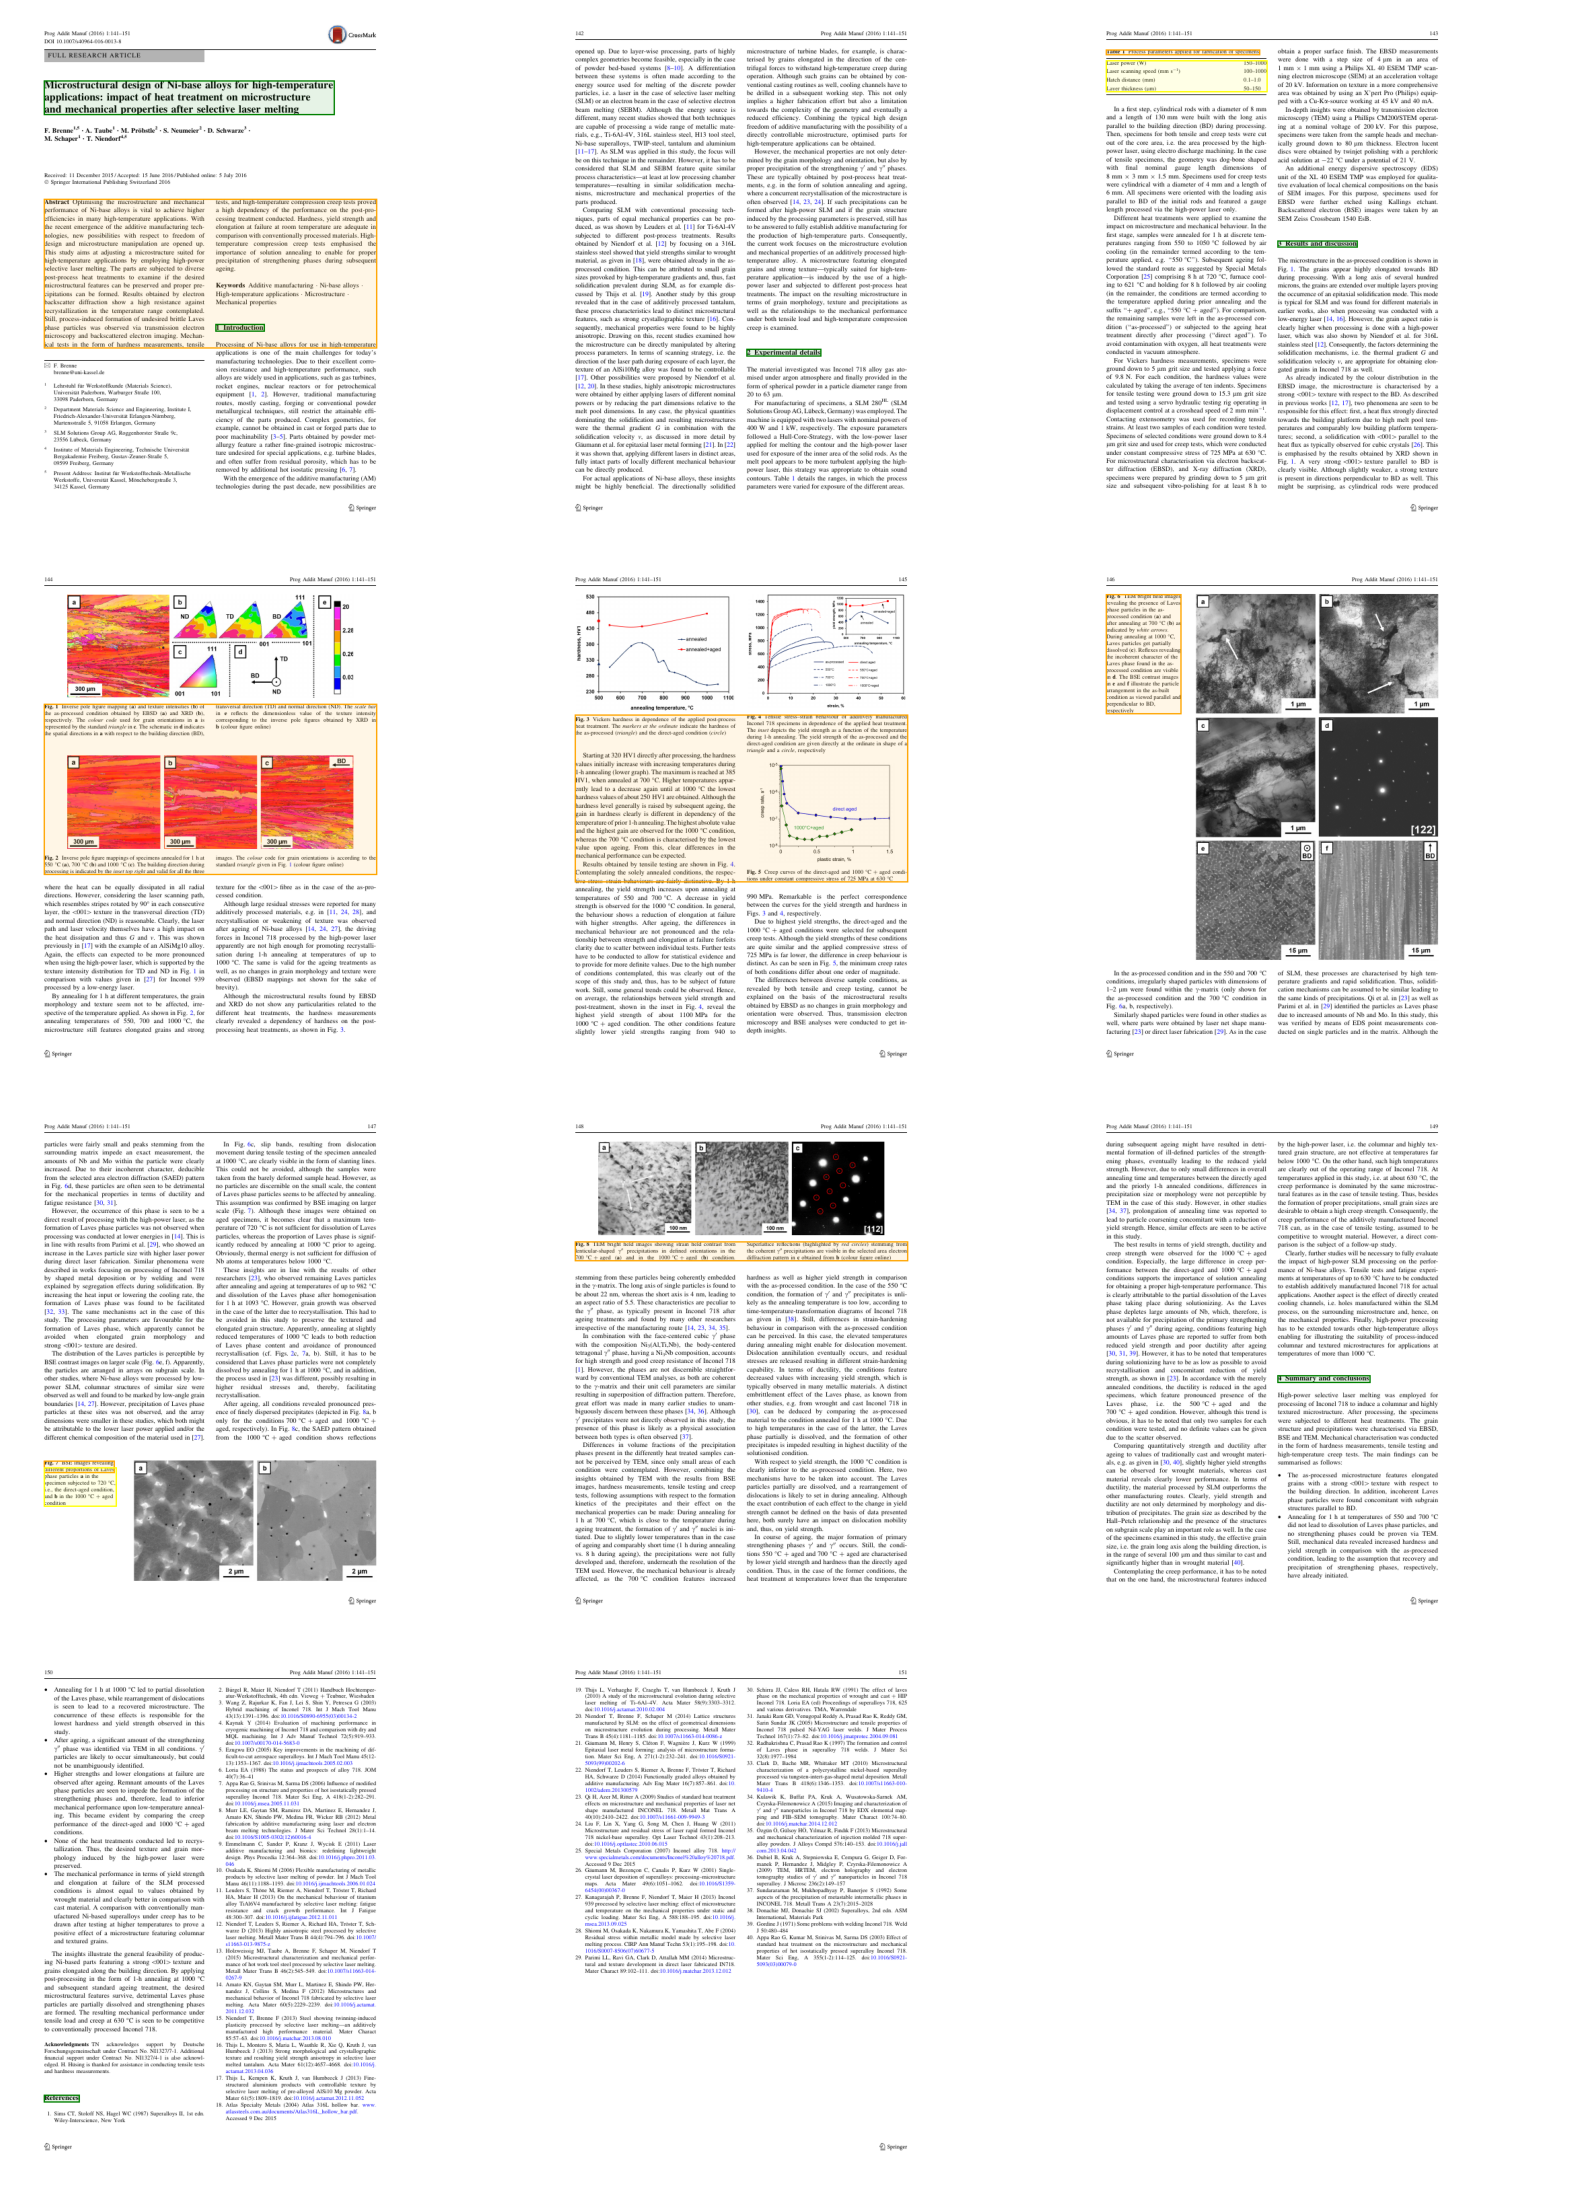

In [146]:
sample_paper = next(paper_iter)
print(sample_paper.titles[0].text)

highlighted_doc = highlight_relevant_entities(sample_paper)

n_cols = 3
n_rows = math.ceil(len(highlighted_doc)/3)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(17,22), tight_layout=True)

for ax in itertools.chain(*axes):
        ax.set_axis_off()

for ax, image in zip(itertools.chain(*axes), highlighted_doc):
    ax.imshow(image.to_array())


In [150]:
for sentence in sample_paper.sentences:
    print(sentence.text.replace("\n", " "))
    print("\n")

FULL RESEARCH ARTICLE Microstructural design of Ni-base alloys for high-temperature applications: impact of heat treatment on microstructure and mechanical properties after selective laser melting F.


Brenne 1,5 • A.


Taube 1 • M.


Pro¨bstle 2 • S.


Neumeier 2 • D.


Schwarze 3 • M.


Schaper 1 • T.


Niendorf 4,5 Received: 11 December 2015/Accepted: 15 June 2016/Published online: 5 July 2016 (cid:2) Springer International Publishing Switzerland 2016 Abstract Optimising the microstructure and mechanical performance of Ni-base alloys is vital to achieve higher efﬁciencies in many high-temperature applications.


With the recent emergence of the additive manufacturing tech- nologies, new possibilities with respect to freedom of design and microstructure manipulation are opened up.


This study aims at adjusting a microstructure suited for high-temperature applications by employing high-power selective laser melting.


The parts are subjected to diverse post-process heat treatments to

In [155]:
for paper in paper_list:
    paper_title = ""
    for title in paper.titles:
        if len(title.text) > len(paper_title):
            paper_title = title.text
    paper_sentences = [sentence.text.replace("\n", " ") for sentence in paper.sentences]
    paper_abstract = paper.abstracts[0].text
    section_text = {}

    with open(f"data/AM_Creep_Papers_parsed/{paper_title.replace(' ', '_')}.json", "w") as f:
        json.dump({
            "title": paper_title, 
            "abstract": paper_abstract,
            "sentences": paper_sentences,
            "section_text": section_text,
        }, f, indent=4)
    

In [156]:
type(paper_list[0])

papermage.magelib.document.Document

In [157]:
from papermage import Document

## NOTES:

- Titles are _sometimes_ (but rarely) flaky
- Figures are borked; we're really not getting much utility.
- Captions are a little better than figures, but there's a weird level of caption agglomeration going on. Not great, but still probably workable for tables.
- Tables seem, to be working fine!!
- a section is occasionally missed